In [2]:
! pip install classy

  Using cached https://files.pythonhosted.org/packages/fb/db/d7b637af503833faae477aa0700755e63e7b481b03c809c6714283bdaf43/classy-2.9.4.0.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Running setup.py clean for classy
Failed to build classy


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\52811\AppData\Local\Continuum\anaconda2\python.exe' 'C:\Users\52811\AppData\Local\Continuum\anaconda2\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'c:\users\52811\appdata\local\temp\tmp444zgx'
       cwd: c:\users\52811\appdata\local\temp\pip-install-7je6ss\classy
  Complete output (14 lines):
  running bdist_wheel
  running build
  running build_py
  package init file 'bbn\__init__.py' not found (or not a regular file)
  creating build
  creating build\lib.win-amd64-2.7
  creating build\lib.win-amd64-2.7\classy
  creating build\lib.win-amd64-2.7\classy\

# CLASS con python.
## Se usa python 3.7.7.
### Luis Osvaldo Téllez Tovar.

Vamos a usar el wrapper de python 3 de CLASS versión 2.9 que fue hecha biblioteca de python por las personas mencionadas en este link:

https://pypi.org/project/classy/

Por ahora NO trabajaremos con la versión modificada para campos escalares que se usó en la sesión anterior pues para usarla es necesario tener instalado CLASS y compilar el wrapper para esa versión. O hacerla una biblioteca de python.

El link para el CLASS original es:

https://github.com/lesgourg/class_public

El link para el CLASS modificado para permitir campos escalares como materia oscura es:

https://github.com/losvaldote/two_sfdm_class

## NOTA: 
Se recomienda usar un ambiente de python.

## Instalar el wrapper de CLASS

In [1]:
! pip install classy

## Importar CLASS

In [2]:
from classy import Class

### Modelo simple.

In [3]:
# Valores de Planck 18 arXiv: 1807.06209

# Con la siguiente linea le pasamos los argumentos a CLASS,
# de manera ananloga a como lo hace el archivo explanatory.ini
LCDM_arguments = {'h': 67.4/100, 'Omega_cdm': 0.264, 'omega_b': 0.0224}

# Definimos una instancia de la clase "CLASS"
LCDM = Class()

# Le damos como argumentos iniciales los que definimos arriba,
# para eso se usa el .set
LCDM.set(LCDM_arguments)

# Se corre CLASS
LCDM.compute()

In [4]:
# Por ejemplo, obtendremos la edad con los valores asignados arriba.
print(LCDM.age())
print(LCDM.Neff())
print(LCDM.Omega0_cdm())
print(LCDM.Omega0_m())

13.811574980885835
3.0459999999999994
0.264
0.3133092305118475


In [5]:
# Otra forma de hacer lo mismo es
# Definimos una instancia de la clase "CLASS"
LCDM_2 = Class()

# Le damos los valores de los parametros.
LCDM_2.set({'h': 67.4/100, 'Omega_cdm': 0.264, 'omega_b': 0.0224})

# Los parametros a los que no se les asigna un valor como en la linea de arriba,
# tomaran el valor por defecto asignado en el archivo input.c de CLASS.

LCDM_2.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Se corre CLASS
LCDM_2.compute()

In [6]:
# Por ejemplo, obtendremos la edad con los valores asignados arriba.
print(LCDM_2.age())
print(LCDM_2.Neff())
print(LCDM_2.Omega0_cdm())
print(LCDM_2.Omega0_m())

13.811574980885835
3.0459999999999994
0.264
0.3133092305118475


## CMB power spectrum

In [7]:
# Graficaremos el CMB power spectrum.
# Le daremos otros valores a los parametros.

# Definimos una instancia de la clase "CLASS"
LambdaCDM = Class()

# Le damos los valores de los parametros de entrada.

LambdaCDM.set({'H0':67.4,
               'T_cmb':2.7255,
               'omega_b': 0.0224,
               'N_ur': 2.0328,
               'Omega_cdm':0.264,
               'Omega_dcdmdr':0.0,
              # 'Gamma_dcdm':0.0,
               'N_ncdm':1.0,
               'ncdm_psd_parameters': '0.3 ,0.5, 0.05',
               'm_ncdm': 0.06,
               'T_ncdm':0.71611,
               'Omega_k':0.0,
               'Omega_fld':0.0,
               'Omega_scf':0.0,
               #'YHE':'BBN',
               'tau_reio':0.054
              })

# Le damos los parametros que queremos que devuelva.
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Se corre CLASS
LambdaCDM.compute()

In [8]:
print(LambdaCDM.age())
print(LambdaCDM.Neff())
print(LambdaCDM.Omega0_cdm())
print(LambdaCDM.Omega0_m())

13.794695749175423
3.0459982214534316
0.264
0.3147271700528846


In [9]:
# Obtendremos los cl de salida
cls = LambdaCDM.lensed_cl(2500)

In [10]:
cls

# tt hacer referencia a los de temperatura.
# ee a la polarización E electromagnetica.
# te a temperatura-polarizacion E cross-power spectrum.
# bb a la polarización B electromagnetica.
# pp a lensing.
# tp a temperature-lensing cross-power spectrum.
# ell son los multipolos

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.54334905e-10, ...,
        1.11505563e-17, 1.11088153e-17, 1.10673412e-17]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 4.67497640e-15, ...,
        4.10181477e-19, 4.10271149e-19, 4.10356027e-19]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.97743787e-13, ...,
        -4.19566574e-19, -4.19696840e-19, -4.19900847e-19]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 2.64571831e-19, ...,
        3.63501637e-21, 3.62693445e-21, 3.61887017e-21]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 9.16617640e-09, ...,
        1.24167392e-22, 1.23832305e-22, 1.23498218e-22]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 4.99044241e-10, ...,
        3.00330266e-23, 3.01291742e-23, 3.02236263e-23]),
 'ell': array([   0,    1,    2, ..., 2498, 2499, 2500])}

In [11]:
# Guardamos en arreglos la informacion anterior.

ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

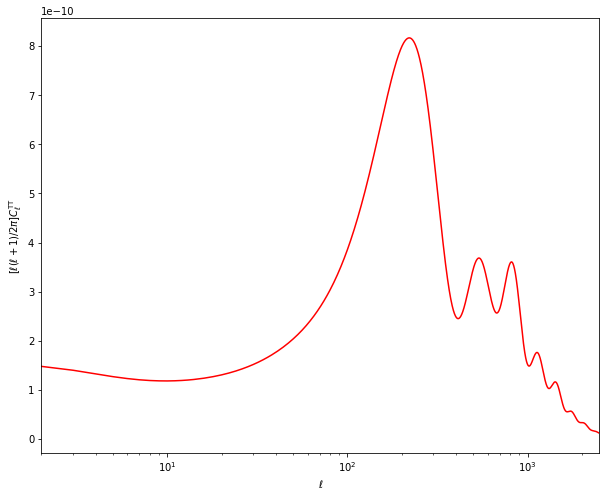

In [13]:
# Graficar C_l^TT
plt.figure(1, figsize=(10,8))

# Escala logaritmica. 
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
#plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')

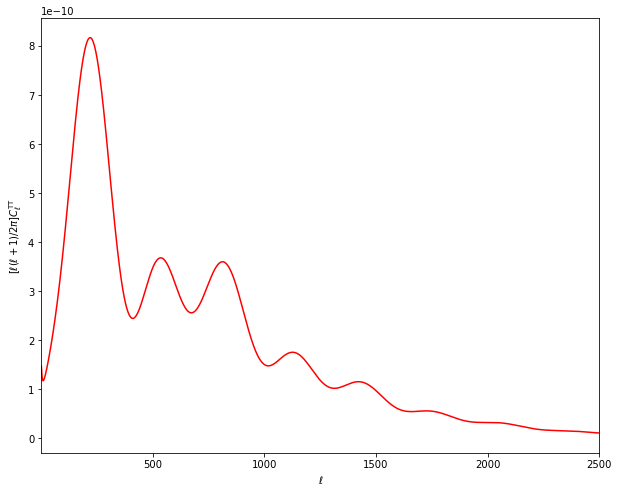

In [14]:
# Graficar C_l^TT
plt.figure(1,figsize=(10,8))
#plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)

# Escala lineal
plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')

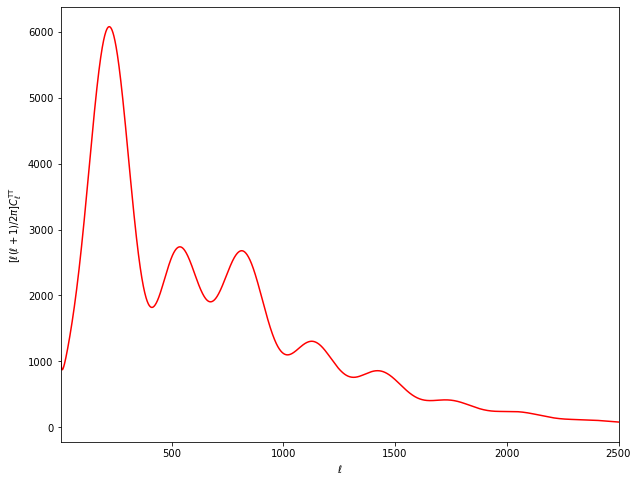

In [15]:
# Graficar C_l^TT
plt.figure(1, figsize=(10,8))


# Escala lineal
plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')

# Formato de CAMB
plt.plot(ll,((2.726e6)**2)*clTT*ll*(ll+1)/2./pi,'r-')

### Compremos con datos.

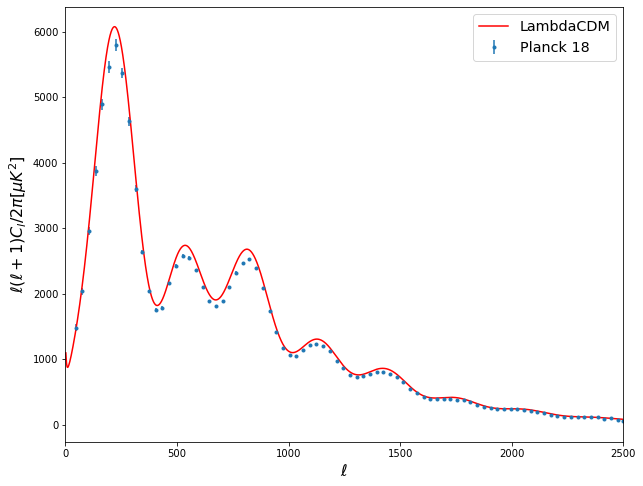

In [16]:
import numpy as np

files = ['/Users/luisosvaldo/Documents/class_m2_cos_cosh/class_public/output/CDM_quadratic/COM_PowerSpect_CMB-TT-binned_R3.01.txt']
data0 = []
for data_file in files:
    data0.append(np.loadtxt(data_file))
roots = ['COM_PowerSpect_CMB-TT-binned_R3.01']

fig, ax = plt.subplots(figsize=(10,8))

index, curve0 = 0, data0[0]
ylim = []
xlim = []

ax.plot(ll,((2.726e6)**2)*clTT*ll*(ll+1)/2./pi, 'red', label="LambdaCDM")
ax.errorbar(curve0[:,0], curve0[:,1], yerr=curve0[:,2], fmt= '.', label="Planck 18")

ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('$\ell (\ell + 1)C_l/2\pi [\mu K^2]$',fontsize=16)
ax.set_xlim(0,2500)

plt.legend(loc = 'best', fontsize = 'x-large')

### Comparemos las dos combinaciones hechas hasta ahora.

In [17]:
cls2 = LCDM_2.lensed_cl(2500)

In [18]:
ll2 = cls2['ell'][2:]
clTT2 = cls2['tt'][2:]
clEE2 = cls2['ee'][2:]
clPP2 = cls2['pp'][2:]

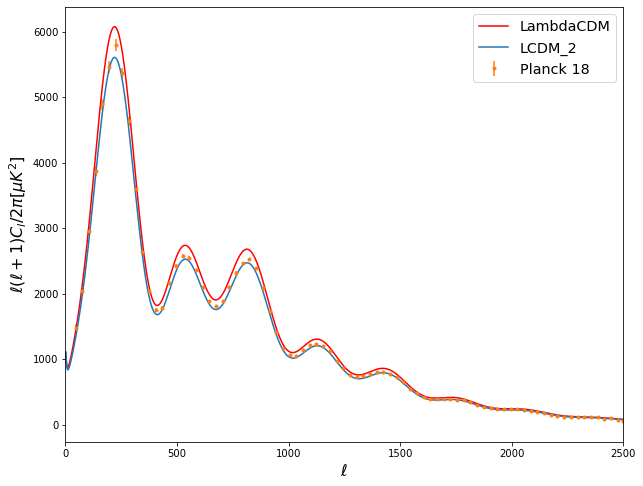

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

index, curve0 = 0, data0[0]
ylim = []
xlim = []

ax.plot(ll,((2.726e6)**2)*clTT*ll*(ll+1)/2./pi, 'red', label="LambdaCDM")
ax.plot(ll2,((2.726e6)**2)*clTT2*ll2*(ll2+1)/2./pi, label="LCDM_2")
ax.errorbar(curve0[:,0], curve0[:,1], yerr=curve0[:,2], fmt= '.', label="Planck 18")

ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('$\ell (\ell + 1)C_l/2\pi [\mu K^2]$',fontsize=16)
ax.set_xlim(0,2500)

plt.legend(loc = 'best', fontsize = 'x-large')

## Mass Power Spectrum

In [20]:
# Obtener P(k) a z=0
kk = np.logspace(-4,np.log10(3),1000) # k en h/Mpc
Pk = [] # P(k) en (Mpc/h)**3
h = LambdaCDM.h() # Hubble reducido para conversiones to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # funcion .pk(k,z)

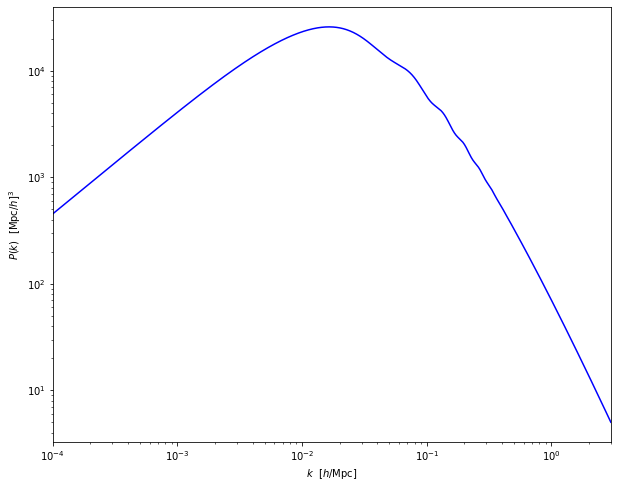

In [22]:
# plot P(k)
plt.figure(2,figsize=(10,8))
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')

### Grafiquemos el background.

In [23]:
LambdaCDM_background = LambdaCDM.get_background()

In [24]:
LambdaCDM_background

{'z': array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
        1.37765334e-02, 6.69210347e-03, 0.00000000e+00]),
 'proper time [Gyr]': array([7.55850453e-26, 7.66469396e-26, 7.77237525e-26, ...,
        1.35968464e+01, 1.36980886e+01, 1.37946957e+01]),
 'conf. time [Mpc]': array([4.63478500e-09, 4.66752681e-09, 4.70026862e-09, ...,
        1.40921871e+04, 1.41235456e+04, 1.41532639e+04]),
 'H [1/Mpc]': array([2.15754569e+22, 2.12765427e+22, 2.09817699e+22, ...,
        2.26300275e-04, 2.25536348e-04, 2.24822200e-04]),
 'comov. dist.': array([14153.2639459 , 14153.2639459 , 14153.2639459 , ...,
           61.07682911,    29.71833544,     0.        ]),
 'ang.diam.dist.': array([1.41532639e-10, 1.42523368e-10, 1.43521032e-10, ...,
        6.02468366e+01, 2.95207793e+01, 0.00000000e+00]),
 'lum. dist.': array([1.41532639e+18, 1.40548798e+18, 1.39571795e+18, ...,
        6.19182561e+01, 2.99172136e+01, 0.00000000e+00]),
 'comov.snd.hrz.': array([2.67595848e-09, 2.69469019e-09, 2.

In [25]:
# Obtendremos las densidades de las distintas componentes.

z = LambdaCDM_background['z'][2:]
r_g = LambdaCDM_background['(.)rho_g'][2:]
r_b = LambdaCDM_background['(.)rho_b'][2:]
r_cdm = LambdaCDM_background['(.)rho_cdm'][2:]
r_ncdm = LambdaCDM_background['(.)rho_ncdm[0]'][2:]
r_lambda = LambdaCDM_background['(.)rho_lambda'][2:]
r_ur = LambdaCDM_background['(.)rho_ur'][2:]
r_crit = LambdaCDM_background['(.)rho_crit'][2:]

In [26]:
# Factor de escala.
loga = []
for aux in z:
    loga.append(np.log10(1./(1. + aux)))

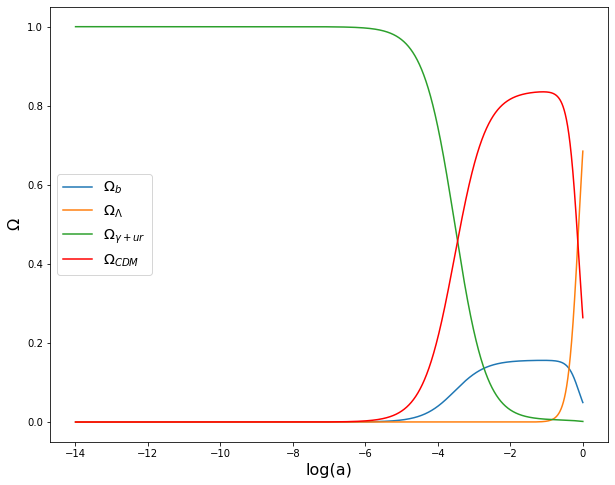

In [27]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(loga, r_b/r_crit, label="$\Omega_b$") #bariones
ax.plot(loga, r_lambda/r_crit, label="$\Omega_{\Lambda}$")#energia oscura
ax.plot(loga, (r_g + r_ncdm + r_ur)/r_crit, label="$\Omega_{\gamma + ur}$")#especies relativistas y fotones.
ax.plot(loga, (r_cdm/r_crit),'red', label="$\Omega_{CDM}$" )#CDM

ax.set_xlabel('log(a)', fontsize=16)
ax.set_ylabel('$\Omega$', fontsize=16)
#ax.set_xlim(-7.0, 0.0)
plt.legend(loc = 'best', fontsize = 'x-large')

## Modelo $\omega_0$$\omega_a$CDM

Revisemos, como ejemplo, una alternativa al modelo $\Lambda$CDM. En este caso consideraremos el modelo para energía oscura llamado parametrización CPL en el que la ecuación de estado está dada por los dos primeros términos de una expansión en serie.

$$w_{fld}(a) = w_0 + w_a (1-a)$$

In [28]:
# Definimos una instancia de la clase "CLASS"
wowaCDM = Class()

# Damos los valores de entrada.

wowaCDM.set({'H0':67.,
               'T_cmb':2.7255,
               'omega_b': 0.0224,
               'N_ur': 2.0328,
               'Omega_cdm':0.264,
               'Omega_dcdmdr':0.0,
              # 'Gamma_dcdm':0.0,
               'N_ncdm':1.0,
               'ncdm_psd_parameters': '0.3 ,0.5, 0.05',
               'm_ncdm': 0.06,
               'T_ncdm':0.71611,
               'Omega_k':0.0,
               # Aqui hay dos formas de completar la densidad de energia oscura.
               # Le damos el valor del Omega_DE correspondiente a LambdaCDM
               # y el codigo usara la restriccion de Friedmann para obtener Omega_Lambda
               # pues recordemos que CLASS tiene tres tipos diferentes de DE.
               'Omega_fld':LambdaCDM.Omega_Lambda(),
               'Omega_scf':0.0,
               # La segunda forma es darle los valores de dos tipos de DE y dejar 
               # que use la restriccion de Friedmann para hallar la densidad de fluido como DE.
               #'Omega_Lambda':0.0,
               #'Omega_scf':0.0,
               'fluid_equation_of_state':'CLP',
               'w0_fld':-0.95,
               'wa_fld':0.75,
               'tau_reio':0.054})

# Ejecutemos CLASS
wowaCDM.compute()

### Grafiquemos $\Omega_{DE}$ para $\Lambda$CDM y $\omega_0 \omega_a$CDM.

In [29]:
# Obtengamos el background de wowaCDM.

wowaCDM_background = wowaCDM.get_background()

In [30]:
wowaCDM_background

{'z': array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
        1.37949965e-02, 6.71191961e-03, 0.00000000e+00]),
 'proper time [Gyr]': array([7.55850453e-26, 7.66469396e-26, 7.77237525e-26, ...,
        1.30527283e+01, 1.31544947e+01, 1.32519475e+01]),
 'conf. time [Mpc]': array([4.63478500e-09, 4.66752681e-09, 4.70026862e-09, ...,
        1.36104320e+04, 1.36419534e+04, 1.36719322e+04]),
 'H [1/Mpc]': array([2.15754569e+22, 2.12765427e+22, 2.09817699e+22, ...,
        2.25134511e-04, 2.24281787e-04, 2.23487964e-04]),
 'comov. dist.': array([13671.93219392, 13671.93219392, 13671.93219392, ...,
           61.50023921,    29.97879483,     0.        ]),
 'ang.diam.dist.': array([1.36719322e-10, 1.37676357e-10, 1.38640092e-10, ...,
        6.06633880e+01, 2.97789211e+01, 0.00000000e+00]),
 'lum. dist.': array([1.36719322e+18, 1.35768939e+18, 1.34825163e+18, ...,
        6.23486348e+01, 3.01800101e+01, 0.00000000e+00]),
 'comov.snd.hrz.': array([2.67595848e-09, 2.69469019e-09, 2.

In [31]:
# Guardemos en arreglos los datos que vamos a graficar.

z_wowa = wowaCDM_background['z'][2:]
r_lambda_wowa = wowaCDM_background['(.)rho_lambda'][2:]
r_fld =  wowaCDM_background['(.)rho_fld'][2:]
r_crit_wowa = wowaCDM_background['(.)rho_crit'][2:]

In [32]:
# Factor de escala.

loga2 = []
for aux in z_wowa:
    loga2.append(np.log10(1./(1. + aux)))

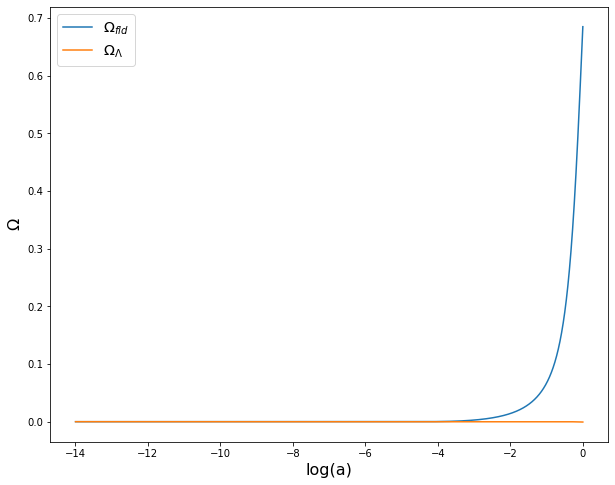

In [33]:
# Hagamos la grafica.

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(loga2, r_fld/r_crit_wowa, label="$\Omega_{fld}$") #bariones
ax.plot(loga2, r_lambda_wowa/r_crit_wowa, label="$\Omega_{\Lambda}$")#energia oscura

ax.set_xlabel('log(a)', fontsize=16)
ax.set_ylabel('$\Omega$', fontsize=16)
#ax.set_xlim(-7.0, 0.0)
plt.legend(loc = 'best', fontsize = 'x-large')

### Veamos la segunda forma de usar la energía oscura.

In [34]:
# Definimos una instancia de la clase "CLASS"
wowaCDM_2 = Class()

# Damos los valores de entrada.

wowaCDM_2.set({'H0':67.,
               'T_cmb':2.7255,
               'omega_b': 0.0224,
               'N_ur': 2.0328,
               'Omega_cdm':0.264,
               'Omega_dcdmdr':0.0,
              # 'Gamma_dcdm':0.0,
               'N_ncdm':1.0,
               'ncdm_psd_parameters': '0.3 ,0.5, 0.05',
               'm_ncdm': 0.06,
               'T_ncdm':0.71611,
               'Omega_k':0.0,
               # Aqui hay dos formas de completar la densidad de energia oscura.
               # Le damos el valor del Omega_DE correspondiente a LambdaCDM
               # y el codigo usara la restriccion de Friedmann para obtener Omega_Lambda
               # pues recordemos que CLASS tiene tres tipos diferentes de DE.
               #'Omega_fld':LambdaCDM.Omega_Lambda(),
               #'Omega_scf':0.0,
               # La segunda forma es darle los valores de dos tipos de DE y dejar 
               # que use la restriccion de Friedmann para hallar la densidad de fluido como DE.
               'Omega_Lambda':0.0,
               'Omega_scf':0.0,
               'fluid_equation_of_state':'CLP',
               'w0_fld':-0.95,
               'wa_fld':0.75,
               'tau_reio':0.054})

# Ejecutemos CLASS
wowaCDM_2.compute()

In [35]:
# Obtengamos el background de wowaCDM.

wowaCDM_background_2 = wowaCDM_2.get_background()

In [36]:
z_wowa_2 = wowaCDM_background_2['z'][2:]

# Si descomentamos esta linea marcara error pues hemos dado en los argumentos Omega_Lambda = 0
# por eso no lo calcula.
#r_lambda_wowa_2 = wowaCDM_background_2['(.)rho_lambda'][2:]

r_fld_2 =  wowaCDM_background_2['(.)rho_fld'][2:]
r_crit_wowa_2 = wowaCDM_background_2['(.)rho_crit'][2:]

In [37]:
# Factor de escala.
loga3 = []
for aux in z_wowa_2:
    loga3.append(np.log10(1./(1. + aux)))

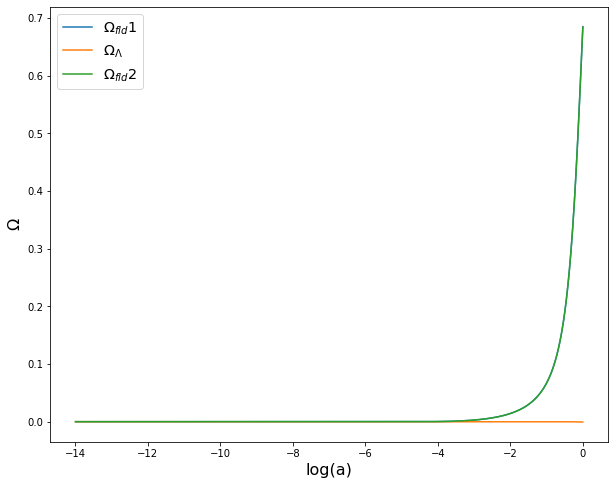

In [38]:
# Hagamos la grafica.

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(loga2, r_fld/r_crit_wowa, label="$\Omega_{fld} 1$") #bariones
ax.plot(loga2, r_lambda_wowa/r_crit_wowa, label="$\Omega_{\Lambda}$")#energia oscura
ax.plot(loga3, r_fld_2/r_crit_wowa_2, label="$\Omega_{fld} 2$")#energia oscura

ax.set_xlabel('log(a)', fontsize=16)
ax.set_ylabel('$\Omega$', fontsize=16)
#ax.set_xlim(-7.0, 0.0)
plt.legend(loc = 'best', fontsize = 'x-large')